# **Project Name**    - OLA Ride Insights - EDA



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('OLA_DataSet.csv')

# Data Cleaning in EDA

In [3]:
print(df.shape)

(103024, 21)


## Convert Data Types

In [4]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


## Check Missing Values

In [5]:
# Count missing values per column
print("OLA dataset missing values:")
print(df.isnull().sum())

OLA dataset missing values:
Date                               0
Time                               0
Booking_ID                         0
Booking_Status                     0
Customer_ID                        0
Vehicle_Type                       0
Pickup_Location                    0
Drop_Location                      0
V_TAT                          39057
C_TAT                          39057
Canceled_Rides_by_Customer     92525
Canceled_Rides_by_Driver       84590
Incomplete_Rides               39057
Incomplete_Rides_Reason        99098
Booking_Value                      0
Payment_Method                 39057
Ride_Distance                      0
Driver_Ratings                 39057
Customer_Rating                39057
Vehicle Images                     0
Unnamed: 20                   103024
dtype: int64


In [6]:
# Fill missing numerical values (with median)
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [7]:
# Fill categorical columns with mode (safe method)
cat_cols = df.select_dtypes(include=["object"]).columns
fill_modes = {col: df[col].mode()[0] for col in cat_cols}
df.fillna(fill_modes, inplace=True)


## Handle Duplicates

In [8]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [9]:
print("Duplicate rows in OLA:", df.duplicated().sum())

Duplicate rows in OLA: 0


In [10]:
# Check cleaned dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       103024 non-null  float64       
 9   C_TAT                       103024 non-null  float64       
 10  Canceled_Rides_by_Customer  103024 non-null  object        
 11  Canceled_Rides_by_Driver    103024 non-

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Unnamed: 20
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,168.0,85.0,...,Personal & Car related issue,No,Customer Demand,444,Cash,0,4.0,4.0,#NAME?,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,Personal & Car related issue,No,Customer Demand,158,Cash,13,4.1,4.0,#NAME?,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,Personal & Car related issue,No,Customer Demand,386,UPI,40,4.2,4.8,#NAME?,NaN
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,168.0,85.0,...,Personal & Car related issue,No,Customer Demand,384,Cash,0,4.0,4.0,#NAME?,NaN
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,Personal & Car related issue,No,Customer Demand,822,Credit Card,45,4.0,3.0,#NAME?,NaN


In [19]:
df.to_csv("oLa_clean.csv", index=False)

# Exploratory Data Analysis (EDA)

## Success vs Canceled rides

In [11]:
df["Booking_Status"].value_counts()


Booking_Status
Success                 63967
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64

## Top Pickup & Drop Locations

In [12]:
df["Pickup_Location"].value_counts().head(10)
df["Drop_Location"].value_counts().head(10)


Drop_Location
Peenya           2159
Mysore Road      2148
MG Road          2128
Hennur           2120
HSR Layout       2117
Sarjapur Road    2108
Koramangala      2105
Marathahalli     2104
Vijayanagar      2103
Hebbal           2097
Name: count, dtype: int64

## Average Fare & Distance

In [13]:
avg_fare = df["Booking_Value"].mean()
avg_distance = df["Ride_Distance"].mean()
print("Average Fare:", round(avg_fare, 2))
print("Average Distance:", round(avg_distance, 2), "km")


Average Fare: 548.75
Average Distance: 14.19 km


## Payment Methods Distribution

In [14]:
df["Payment_Method"].value_counts(normalize=True) * 100


Payment_Method
Cash           71.904605
UPI            25.121331
Credit Card     2.363527
Debit Card      0.610537
Name: proportion, dtype: float64

# Visualizations

## Success vs Canceled Rides (Bar Chart)

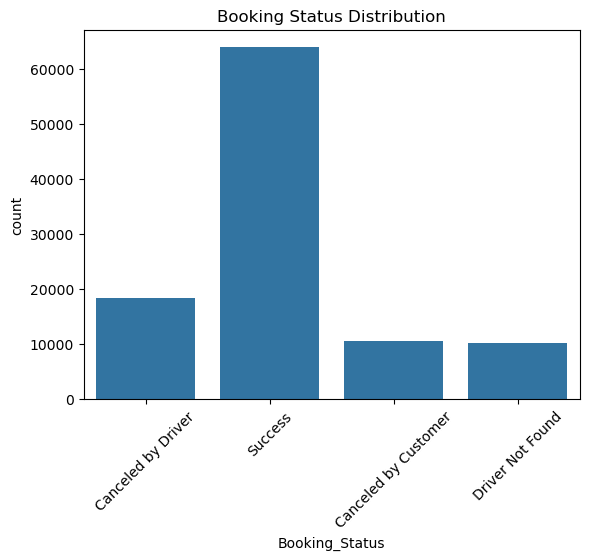

In [15]:

sns.countplot(data=df, x="Booking_Status")
plt.title("Booking Status Distribution")
plt.xticks(rotation=45)
plt.show()

## Payment Method (Pie Chart)

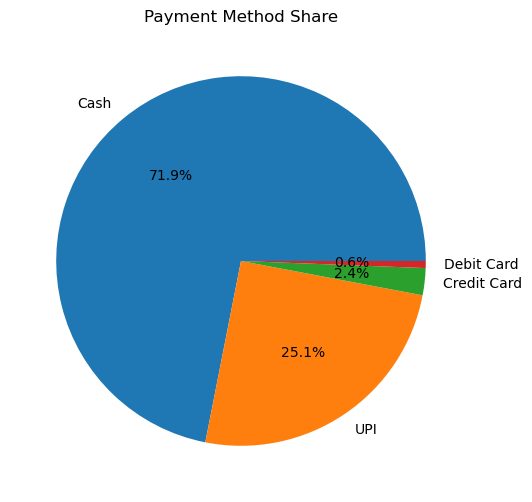

In [16]:
df["Payment_Method"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Payment Method Share")
plt.ylabel("")
plt.show()

## Top 10 Pickup Locations (Bar Chart)

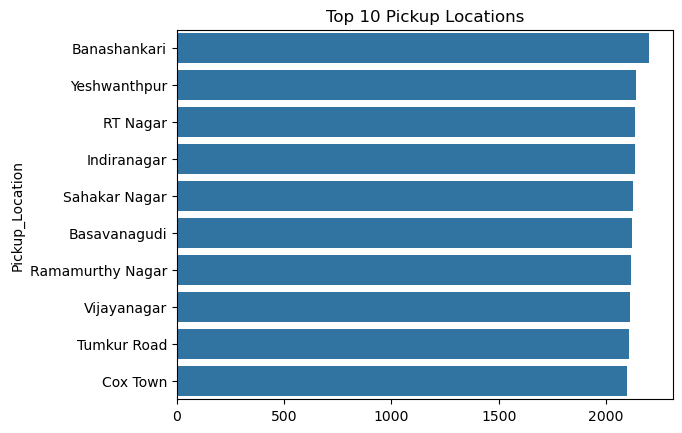

In [17]:
top_pickups = df["Pickup_Location"].value_counts().head(10)
sns.barplot(x=top_pickups.values, y=top_pickups.index)
plt.title("Top 10 Pickup Locations")
plt.show()

## Heatmap: Distance vs Fare

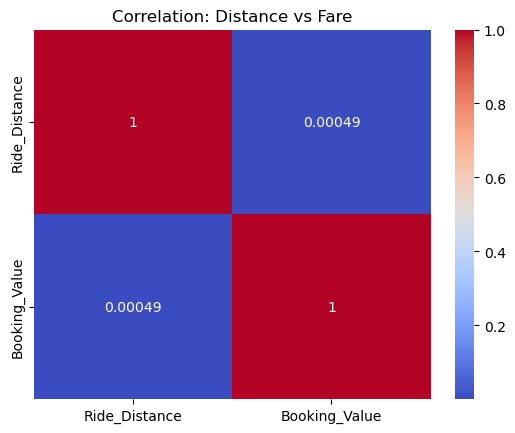

In [18]:
sns.heatmap(df[["Ride_Distance", "Booking_Value"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation: Distance vs Fare")
plt.show()
